# 1.

C:\Users\tiago\AppData\Local\Temp\ipykernel_21804\4075938363.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["class"] == b'Spondylolisthesis'][most_discriminative_variable], hist=False, label="Spondylolisthesis", ax=ax1)
C:\Users\tiago\OneDrive\Desktop\Aprendizagem\Homeworks\Homework 1\myvenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tiago\OneDrive\Desktop\Aprendizagem\Homeworks\Homework 1\myvenv\lib\site-packages\seaborn\_old

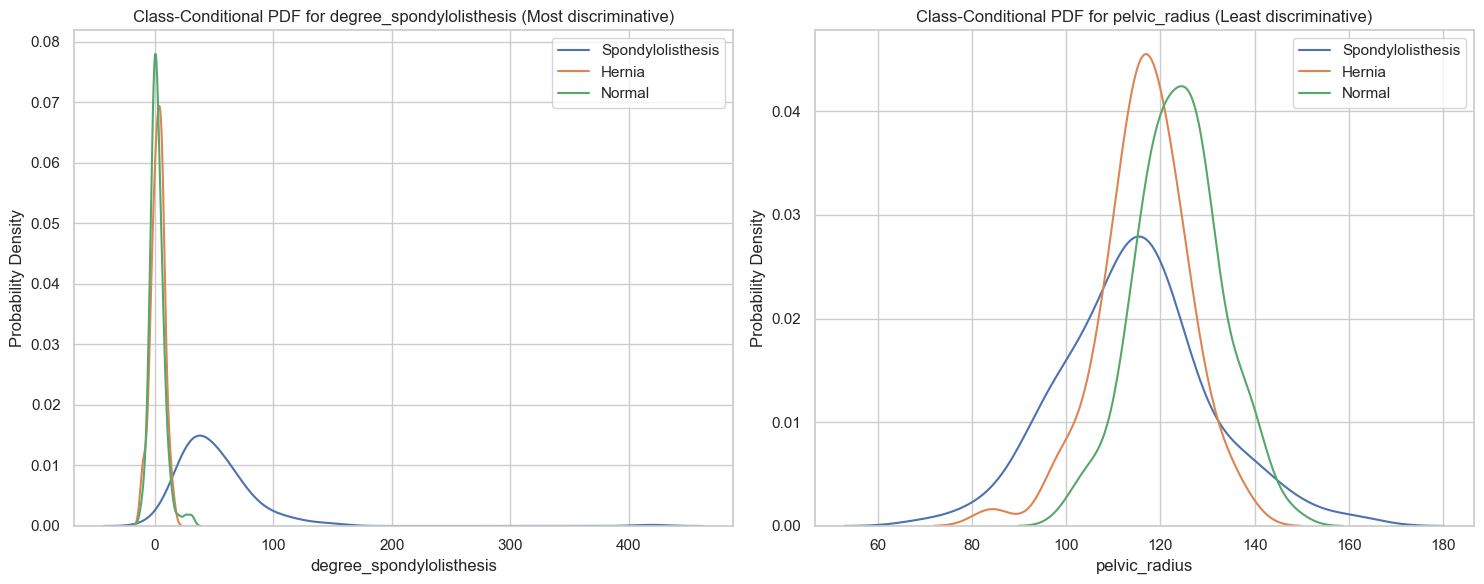

In [9]:
from sklearn.feature_selection import f_classif
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = loadarff('column_diagnosis.arff')

df = pd.DataFrame(data[0])

x = df.drop('class', axis=1)
y = df['class']

f_values, p_values = f_classif(x, y)

highest_discriminative_idx = np.argmax(f_values)
lowest_discriminative_idx = np.argmin(f_values)

variable_names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]

most_discriminative_variable = variable_names[highest_discriminative_idx]
least_discriminative_variable = variable_names[lowest_discriminative_idx]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.distplot(df[df["class"] == b'Spondylolisthesis'][most_discriminative_variable], hist=False, label="Spondylolisthesis", ax=ax1)
sns.distplot(df[df["class"] == b'Hernia'][most_discriminative_variable], hist=False, label="Hernia", ax=ax1)
sns.distplot(df[df["class"] == b'Normal'][most_discriminative_variable], hist=False, label="Normal", ax=ax1)
ax1.set_xlabel(most_discriminative_variable)
ax1.set_ylabel("Probability Density")
ax1.set_title(f"Class-Conditional PDF for {most_discriminative_variable} (Most discriminative)")

sns.distplot(df[df["class"] == b'Spondylolisthesis'][least_discriminative_variable], hist=False, label="Spondylolisthesis", ax=ax2)
sns.distplot(df[df["class"] == b'Hernia'][least_discriminative_variable], hist=False, label="Hernia", ax=ax2)
sns.distplot(df[df["class"] == b'Normal'][least_discriminative_variable], hist=False, label="Normal", ax=ax2)
ax2.set_xlabel(least_discriminative_variable)
ax2.set_ylabel("Probability Density")
ax2.set_title(f"Class-Conditional PDF for {least_discriminative_variable} (Least discriminative)")

ax1.legend()
ax2.legend()

plt.savefig("Exercicio1.png")
plt.tight_layout()
plt.show()

# 2.

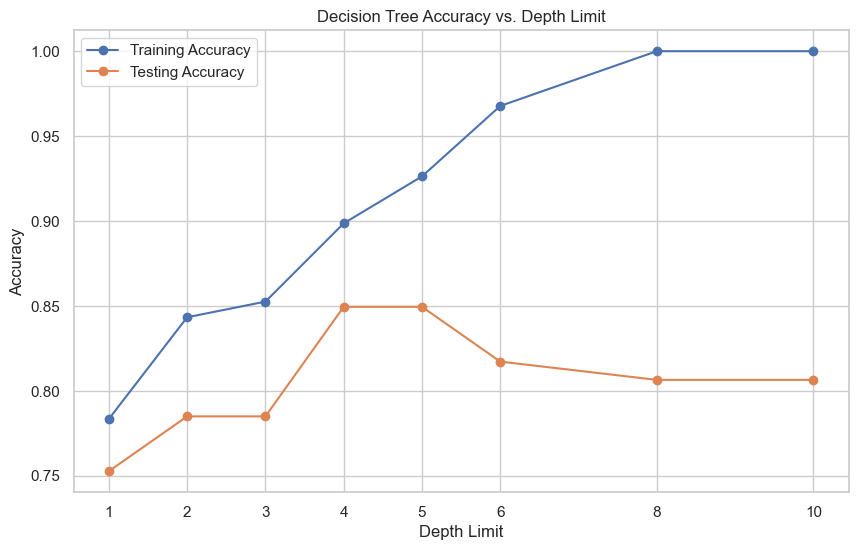

In [6]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = loadarff('column_diagnosis.arff')

df = pd.DataFrame(data[0])

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0, stratify=y)

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

train_accuracies = []
test_accuracies = []

for depth in depth_limits:
    train_acc = 0
    test_acc = 0
    for _ in range(10):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        clf.fit(x_train, y_train)

        train_acc += accuracy_score(y_train, clf.predict(x_train))
        test_acc += accuracy_score(y_test, clf.predict(x_test))

    train_acc /= 10
    test_acc /= 10

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Accuracy vs. Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(depth_limits)

plt.savefig("Exercicio2.png")

plt.show()

# 3.

Ao observar o gráfico resultante do exercício anterior, reparamos que a accuracy do treino melhora com o aumento da profundidade da árvore de decisão. Este resultado faz sentido e pode ser explicado pelo facto de árvores de decisão mais profundas tedem a capturar padrões mais complexos nos dados para treino.
Por outro lado, a accuracy de teste começa por aumentar até à profundidade de 4 ou 5, começando logo em seguida a descer. Este comportamento pode ser explicado pelo overfitting que é um fenómeno onde árvores mais profundas se tornam demasiado específicas para os valores usados no treino e por consequência não conseguem generalizar os resultados para dados novos, os dados de teste.
O resultado mais alto da accuracy de teste é em árvores de profundidade 4 ou 5, isto quer dizer que árvores de profundidade média são as que oferecem melhores resultados evitando o problema de overfitting.
Concluindo, a escolha de uma profundidade de 4 ou 5 parece ser a mais adequada para este caso.

# 4. i.

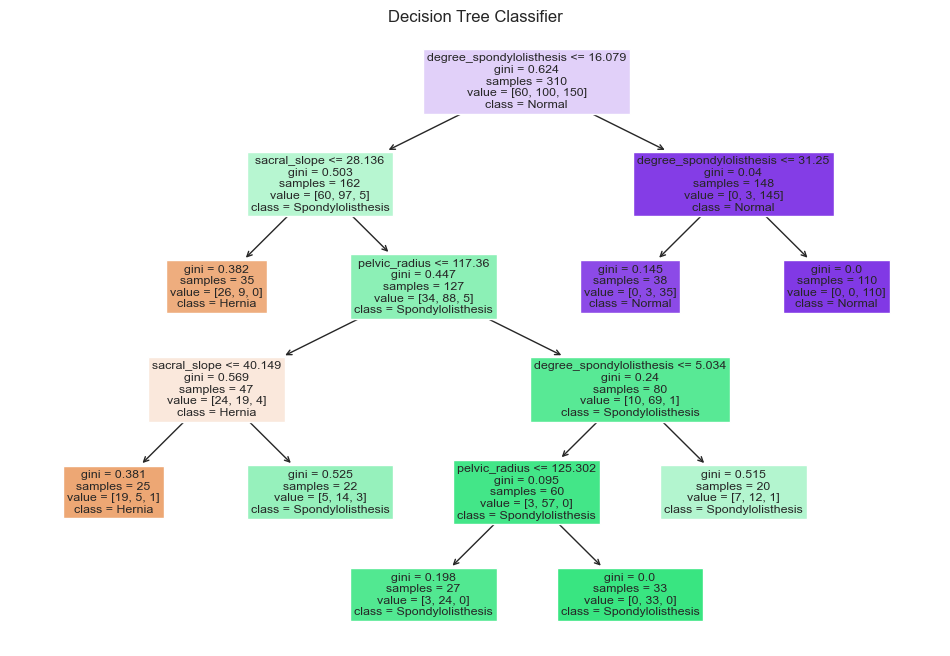

In [7]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

data = loadarff('column_diagnosis.arff')

df = pd.DataFrame(data[0])

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

x = df.drop('class', axis=1)
y = df['class']

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
clf.fit(x, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['Hernia', 'Spondylolisthesis', 'Normal'])
plt.title("Decision Tree Classifier")
plt.savefig("Exercicio4.png")
plt.show()

# ii.

Para detetar a presença de Disk Hernia através da nossa árvore de decisão é possível seguir dois ramos da árvore. O primeiro e mais simples, permite-nos chegar à conclusão que um paciente tem esta doença apenas sabendo que tem um degree\_spondylolisthesis $<=$ 16,079 e um sacral\_slope $<=$ 28,136. Para se chegar à mesma conclusão pelo segundo ramo, é preciso não só degree\_spondylolisthesis $<=$ 16,079, mas também uma pelvic\_radius $<=$ 117,36 e uma sacral\_slope $<=$ 40,149. Com isto concluímos, que se pode considerar que um paciente tem uma Disk Hernia quando tem um degree\_spondylolisthesis $<=$ 16,079 e uma sacral\_slope $<=$ 28,136, no entanto se a sacral\_slope $>$ 28,136, mas ainda for $<=$ 40,149 e se a pelvic\_radius $<=$ 117,36 também é possível concluir que o paciente tem Disk Hernia.